<a href="https://colab.research.google.com/github/alfankevin/praktikum-pcvk/blob/main/Week03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* **Brightness**

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


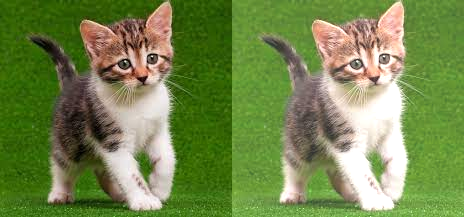

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/kitten01.jpg')
# brightness = np.zeros(original.shape, original.dtype)

# akses per piksel
# for y in range(original.shape[0]):
#   for x in range(original.shape[1]):
#     for c in range(original.shape[2]):
#       brightness[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
brightness = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness))
cv2_imshow(final_frame)

* **Inverse**

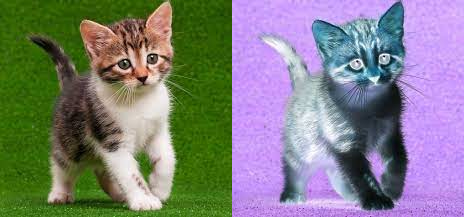

In [ ]:
inverse = np.copy(original)
height, width, channels = original.shape

for i in range(channels):
  inverse[:, :, i] = 255 - inverse[:, :, i]

final_frame = cv.hconcat((original, inverse))
cv2_imshow(final_frame)

* **Contrast**

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


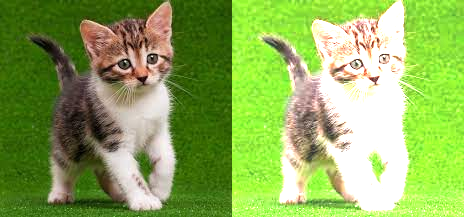

In [ ]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
contrast = int(input('Masukkan kontras [1.0 - 3.0]: '))

adjusted = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)
final_frame = cv.hconcat((original, adjusted))
cv2_imshow(final_frame)

* **Logarithmic Brightness**

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 50


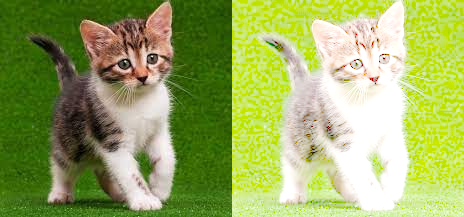

In [ ]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

try:
  value = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

log = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      log[y,x,c] = np.clip(value * (np.log(1 + original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, log))
cv2_imshow(final_frame)

* **Grayscale**
  * Averaging

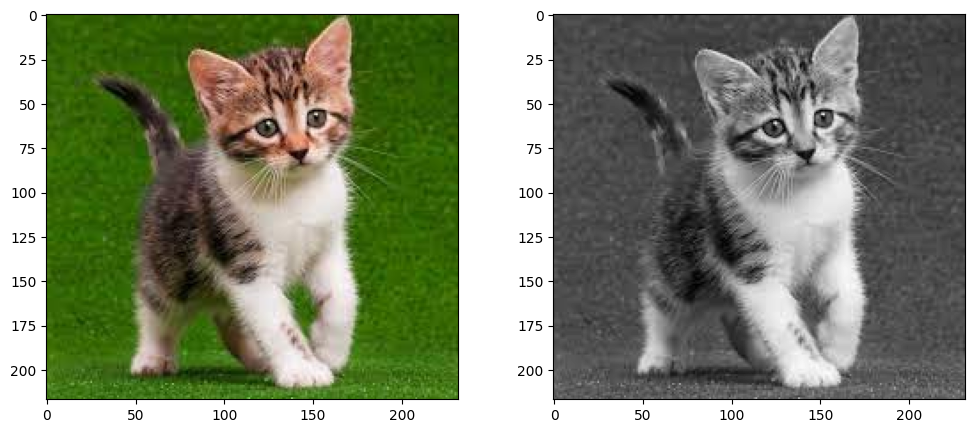

In [ ]:
kitten = cv.imread('/content/drive/MyDrive/kitten01.jpg')
averaging = cv.cvtColor(kitten, cv.COLOR_BGR2GRAY)
fig, (original, average) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(kitten, cv.COLOR_BGR2RGB))
average.imshow(averaging, cmap='gray')

plt.show()

  * Lightness

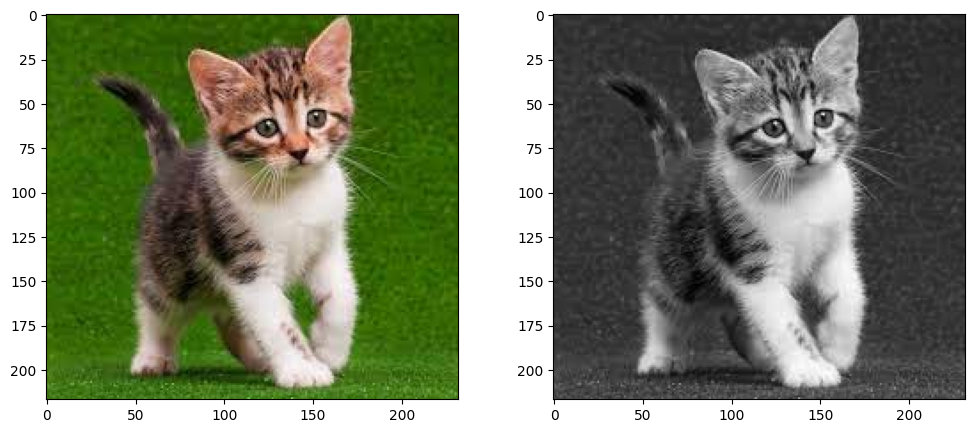

In [ ]:
lightness = cv.cvtColor(kitten, cv.COLOR_BGR2HLS)
l_channel = lightness[:, :, 1]
fig, (original, light) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(kitten, cv.COLOR_BGR2RGB))
light.imshow(l_channel, cmap='gray')

plt.show()

* Luminance

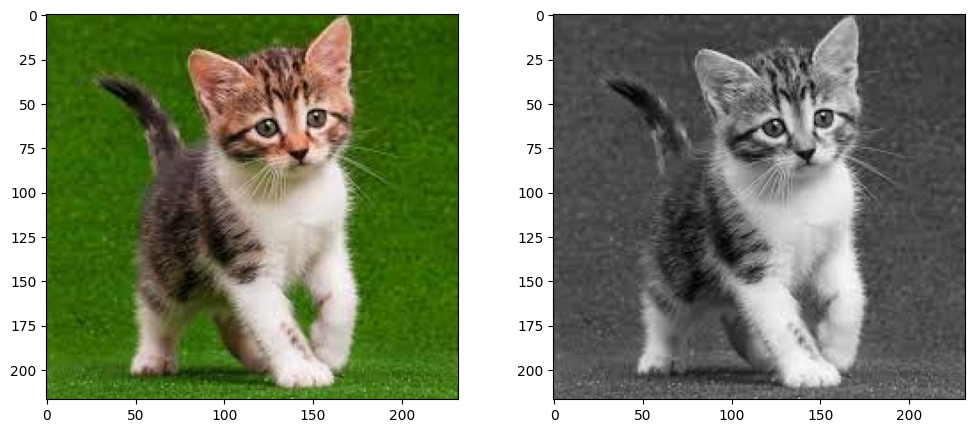

In [ ]:
luminance = cv.cvtColor(kitten, cv.COLOR_BGR2YUV)
y_channel = luminance[:, :, 0]
fig, (original, lumine) = plt.subplots(1, 2, figsize=(12, 5))

original.imshow(cv.cvtColor(kitten, cv.COLOR_BGR2RGB))
lumine.imshow(y_channel, cmap='gray')

plt.show()

* **Colors**

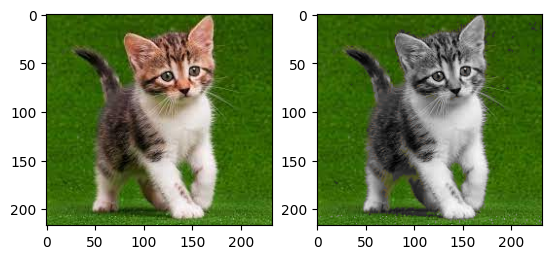

In [ ]:
citra = cv.cvtColor(kitten, cv.COLOR_BGR2RGB)

# Menentukan rentang warna hijau (dalam format BGR)
lower = np.array([0, 75, 0], dtype=np.uint8)
upper = np.array([100, 255, 100], dtype=np.uint8)

# Membuat mask hijau
mask = cv.inRange(citra, lower, upper)

# Invers mask hijau (hijau menjadi putih, latar belakang menjadi hitam)
mask_inv = cv.bitwise_not(mask)

# Mengubah latar belakang menjadi abu-abu
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
citra_gray = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Menggabungkan gambar hijau dan latar belakang abu-abu
out = cv.bitwise_and(citra, citra, mask=mask)
out_bg = cv.bitwise_and(citra_gray, citra_gray, mask=mask_inv)
result = cv.add(out, out_bg)

# Menampilkan gambar asli dan hasilnya
fig, ax = plt.subplots(1, 2)
ax[0].imshow(citra)
ax[1].imshow(result)
plt.show()